In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat


# carregar arquivo .mat
mat = loadmat('in_out_SBRT2_direto.mat')

in_data_ext = mat['in_extraction']
out_data_ext = mat['out_extraction']
in_data_val = mat['in_validation']
out_data_val = mat['out_validation']


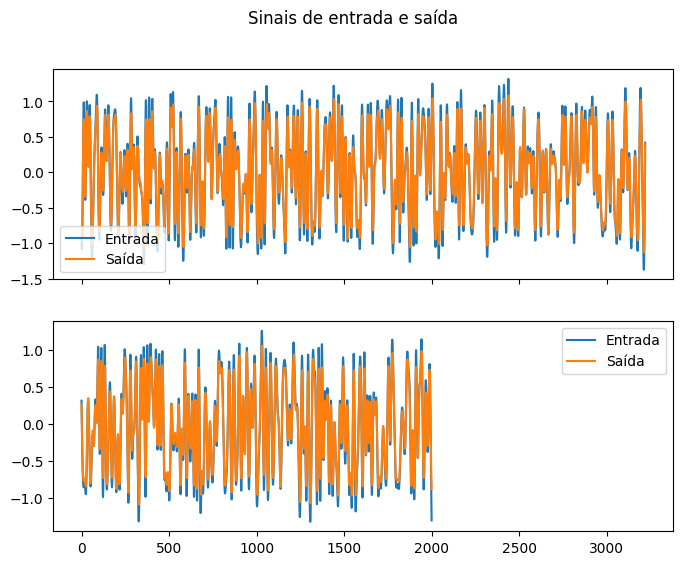

In [2]:
# plotar sinais de entrada e saída
x_ext = range(len(in_data_ext))
x_val = range(len(in_data_val))

fig, axs = plt.subplots(2, sharex=True, figsize=(8, 6))
fig.suptitle('Sinais de entrada e saída')
axs[0].plot(x_ext, np.real(in_data_ext), label='Entrada')
axs[0].plot(x_ext, np.real(out_data_ext), label='Saída')
axs[0].legend()
axs[1].plot(x_val, np.real(in_data_val), label='Entrada')
axs[1].plot(x_val, np.real(out_data_val), label='Saída')
axs[1].legend()
plt.show()

In [4]:
def MatrizXX(in_data, P, M ):
    n = len(in_data)
    # Matriz de entrada XX para o conjunto de dados de extração
    XX_ext = np.zeros((n - M, 2*P), dtype=np.complex128)
    for i in range(M, n):
        XX_ext[i-M, 0] = in_data[i]
        for j in range(1, P):
            XX_ext[i-M, 2*j-1] = in_data[i-j].real ** j
            XX_ext[i-M, 2*j] = in_data[i-j].imag ** j
    return XX_ext

In [9]:
XX_ext = MatrizXX(in_data_ext, 5, 1)
XX_val = MatrizXX(in_data_val, 5, 1)

In [10]:
# Coeficientes do modelo MP
coefficients, _, _, _ = np.linalg.lstsq(XX_ext, out_data_ext[M:], rcond=None)

# Saída estimada para o conjunto de dados de validação
predicted_val = XX_val @ coefficients


In [11]:
nmse = 10*np.log10(np.mean(np.abs(out_data_val[M:] - predicted_val) ** 2) / np.mean(np.abs(out_data_val[M:]) ** 2))
nmse

-22.414478974852635

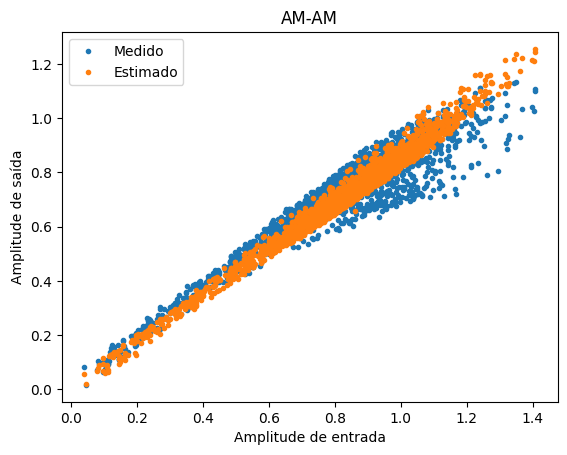

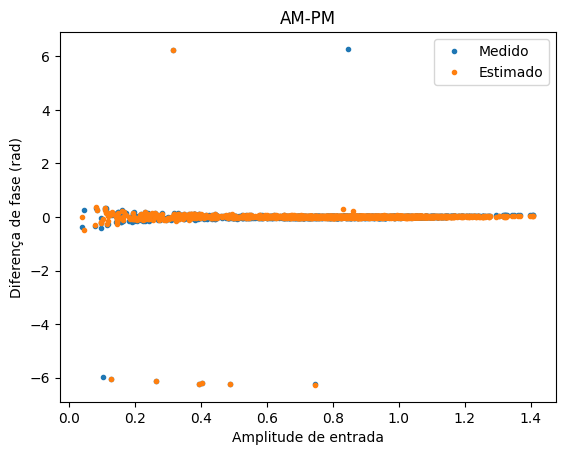

In [12]:
# Gráficos AM-AM e AM-PM
plt.figure()
plt.plot(np.abs(in_data_val[M:]), np.abs(out_data_val[M:]), '.', label='Medido')
plt.plot(np.abs(in_data_val[M:]), np.abs(predicted_val), '.', label='Estimado')
plt.xlabel('Amplitude de entrada')
plt.ylabel('Amplitude de saída')
plt.title('AM-AM')
plt.legend()

plt.figure()
plt.plot(np.abs(in_data_val[M:]), np.angle(out_data_val[M:])-np.angle(in_data_val[M:]), '.', label='Medido')
plt.plot(np.abs(in_data_val[M:]), np.angle(predicted_val)-np.angle(in_data_val[M:]), '.', label='Estimado')
plt.xlabel('Amplitude de entrada')
plt.ylabel('Diferença de fase (rad)')
plt.title('AM-PM')
plt.legend()